In [2]:
# Develop the job requisition and use Python to parse out the relevant key words
# from code tutorial Parsing Job Profiles Through NLP by Abhishek Chhibber https://abhishekchhibber.com/2017/07/05/parsing-job-profiles-through-nlp/

# Read the text file of the job requisition

import os 

with open('/content/job_description.txt', 'r') as data:
    job_description = data.read()

# lowercase the job description to remove redundancies

job_description = job_description.lower()
print(job_description)




develop machine learning models to predict consumer travel preferences based on past preferences.
develop machine learning models that can offer tailor-made recommendations to our customers.
collaborate with the development team to deploy machine learning models in production and troubleshoot any vulnerabilities in code.
analyze and wrangle large datasets and derive meaningful insights in the data that will drive strategy and future product offerings.
keep abreast with the latest technology in artificial intelligence and machine learning to drive future product enhancements.


In [3]:
# From code tutorial Parsing Job Profiles Through NLP by Abhishek Chhibber https://abhishekchhibber.com/2017/07/05/parsing-job-profiles-through-nlp/

# Find the most frequent words and most frequent phrases in job description

# print the number of tokens in the job description
import nltk
nltk.download('punkt')
from nltk import word_tokenize
tokens = nltk.word_tokenize(job_description)
print (len(tokens))


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


85


In [4]:
# From code tutorial Parsing Job Profiles Through NLP by Abhishek Chhibber https://abhishekchhibber.com/2017/07/05/parsing-job-profiles-through-nlp/

# Remove stop words from the job description
nltk.download('stopwords')
from nltk.corpus import stopwords

stop = set(stopwords.words('english'))
stop_words = []

token_list1 = [ ]
for token in tokens:
    if token not in stop:
        token_list1.append(token)
    else:
      stop_words.append(token)

print("Number of stop words: {}".format(len(stop_words)))
print("Number of tokens after removing stop words: {}".format(len(token_list1)))
print("The stop words are: {}".format(stop_words))

Number of stop words: 25
Number of tokens after removing stop words: 60
The stop words are: ['to', 'on', 'that', 'can', 'to', 'our', 'with', 'the', 'to', 'in', 'and', 'any', 'in', 'and', 'and', 'in', 'the', 'that', 'will', 'and', 'with', 'the', 'in', 'and', 'to']


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [5]:
# From code tutorial Parsing Job Profiles Through NLP by Abhishek Chhibber https://abhishekchhibber.com/2017/07/05/parsing-job-profiles-through-nlp/


# Remove all numbers and punctuation using RegEx

import re

punctuation = re.compile(r'[-.?!,":;()|0-9]')

token_list_stripped = [ ]

for token in token_list1:
    word = punctuation.sub("", token)
    if len(word)>0:
        token_list_stripped.append(word)

print(len(token_list_stripped))

55


In [6]:
# From code tutorial Parsing Job Profiles Through NLP by Abhishek Chhibber https://abhishekchhibber.com/2017/07/05/parsing-job-profiles-through-nlp/

# Find the most frequent words
# Use NLTK to add POS tags to all words and convert to Pandas Dataframe

import pandas as pd
import numpy as np
nltk.download('averaged_perceptron_tagger')

tokens_pos_tag = nltk.pos_tag(token_list_stripped)
pos_df = pd.DataFrame(tokens_pos_tag, columns = ('word','POS'))

pos_sum = pos_df.groupby('POS', as_index=False).count() # group by POS tags
pos_sum.sort_values(['word'], ascending=[False], inplace=True) # in descending order of number of words per tag

# Map tag abbreviations to meanings
tag_map = {
    'JJ': 'adjective',
    'JJS': 'adjective, superlative',
    'IN': 'preposition or subordinating conjunction',
    'NN': 'noun, singular or mass',
    'NNS': 'noun, plural',
    'VB': 'verb, base form',
    'VBG': 'verb, gerund or present participle',
    'VBN': 'verb, past participle',
    'VBP': 'verb, non-3rd person singular present',
    'CD': 'cardinal digit'
}

# Replace tag abbreviations with meanings
pos_sum['POS_meaning'] = pos_sum['POS'].replace(tag_map)

# Print the results
print(pos_sum[['POS', 'POS_meaning', 'word']])



[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


   POS                               POS_meaning  word
3   NN                    noun, singular or mass    19
4  NNS                              noun, plural    14
1   JJ                                 adjective     9
8  VBP     verb, non-3rd person singular present     6
5   VB                           verb, base form     2
6  VBG        verb, gerund or present participle     2
0   IN  preposition or subordinating conjunction     1
2  JJS                    adjective, superlative     1
7  VBN                     verb, past participle     1


In [7]:
# From code tutorial Parsing Job Profiles Through NLP by Abhishek Chhibber https://abhishekchhibber.com/2017/07/05/parsing-job-profiles-through-nlp/


# Retrieve the top 10 key words in the job description

fdist_pos = nltk.FreqDist(token_list_stripped)
top_10_words = fdist_pos.most_common(10)
print(top_10_words)

[('machine', 4), ('learning', 4), ('models', 3), ('develop', 2), ('preferences', 2), ('drive', 2), ('future', 2), ('product', 2), ('predict', 1), ('consumer', 1)]


In [8]:
# From code tutorial Parsing Job Profiles Through NLP by Abhishek Chhibber https://abhishekchhibber.com/2017/07/05/parsing-job-profiles-through-nlp/


# Convert top 10 words from job description into Pandas dataframe and clean up

top_words_df = pd.DataFrame(top_10_words, columns = ('pos','count'))
top_words_df['Word'] = top_words_df['pos'].apply(lambda x: x) # split the tuple of POS
top_words_df = top_words_df.drop('pos', 1) # drop the previous column
top_words_df.head()

<ipython-input-8-a45d495f449c>:8: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  top_words_df = top_words_df.drop('pos', 1) # drop the previous column


,count,Word
0,4,machine
1,4,learning
2,3,models
3,2,develop
4,2,preferences


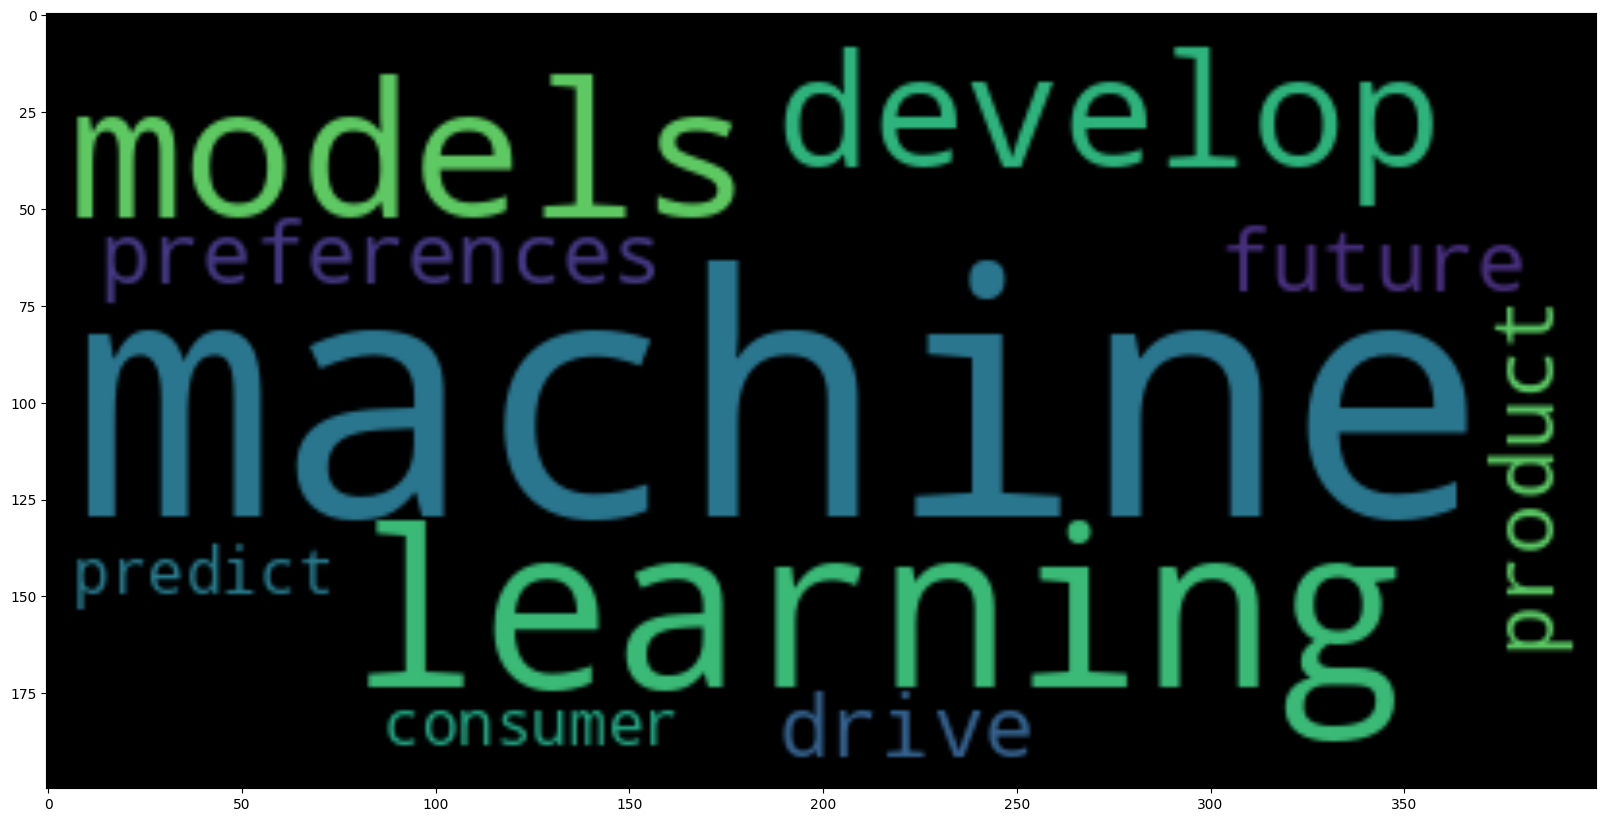

In [9]:
# From code tutorial Parsing Job Profiles Through NLP by Abhishek Chhibber https://abhishekchhibber.com/2017/07/05/parsing-job-profiles-through-nlp/


# Show the top 10 words from the job description in a word cloud

from wordcloud import WordCloud
import matplotlib.pyplot as plt

subset_pos = top_words_df[['Word', 'count']]
tuples_pos = [tuple(x) for x in subset_pos.values]
word_dict = {word: count for word, count in tuples_pos}  # Convert list of tuples to a dictionary
wordcloud = WordCloud()
wordcloud.generate_from_frequencies(word_dict)
plt.figure(figsize=(20,15))
plt.imshow(wordcloud, interpolation="bilinear")
plt.show()


In [10]:
# Develop the Python functions to parse out the keywords from the job candidate resumes

# Tutorial code from https://www.analyticsvidhya.com/blog/2021/06/resume-screening-with-natural-language-processing-in-python/

# read in csv of resume dataset and show first 5 records

import pandas as pd
import matplotlib.pyplot as plt

resume_df = pd.read_csv('/content/UpdatedResumeDataSet.csv', encoding='utf-8')
resume_df.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


Mean length of resumes: 3160.364864864865
Median length of resumes: 2355.0
Mode length of resumes: 1590


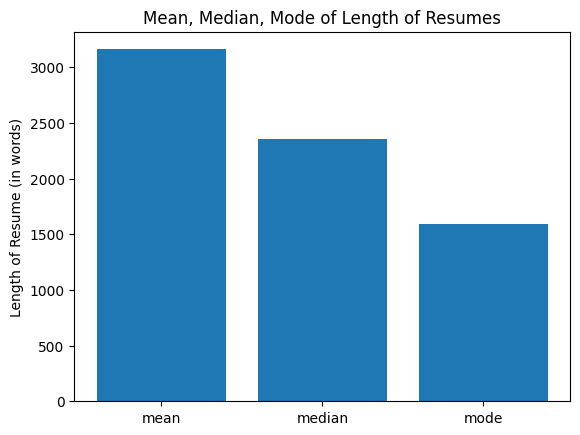

In [11]:
# Matplotlib documentation: https://matplotlib.org/stable/tutorials/introductory/pyplot.html#sphx-glr-tutorials-introductory-pyplot-py

# Derive length of resumes

resume_df['Resume_Length'] = resume_df['Resume'].str.len()

# Show the mean, median, and mode of the length of resumes on a bar chart

mean_length = resume_df['Resume_Length'].mean()
median_length = resume_df['Resume_Length'].median()
mode_length = resume_df['Resume_Length'].mode().values[0]


print("Mean length of resumes: {}".format(mean_length))
print("Median length of resumes: {}".format(median_length))
print("Mode length of resumes: {}".format(mode_length))

plt.bar(['mean', 'median', 'mode'], [mean_length, median_length, mode_length])
plt.title('Mean, Median, Mode of Length of Resumes')
plt.ylabel('Length of Resume (in words)')
plt.show()



<ipython-input-12-12d1f8fa32ef>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(resume_df['Resume_Length']).set_title('Distribution of the length of resumes')


Text(0.5, 1.0, 'Distribution of the length of resumes')

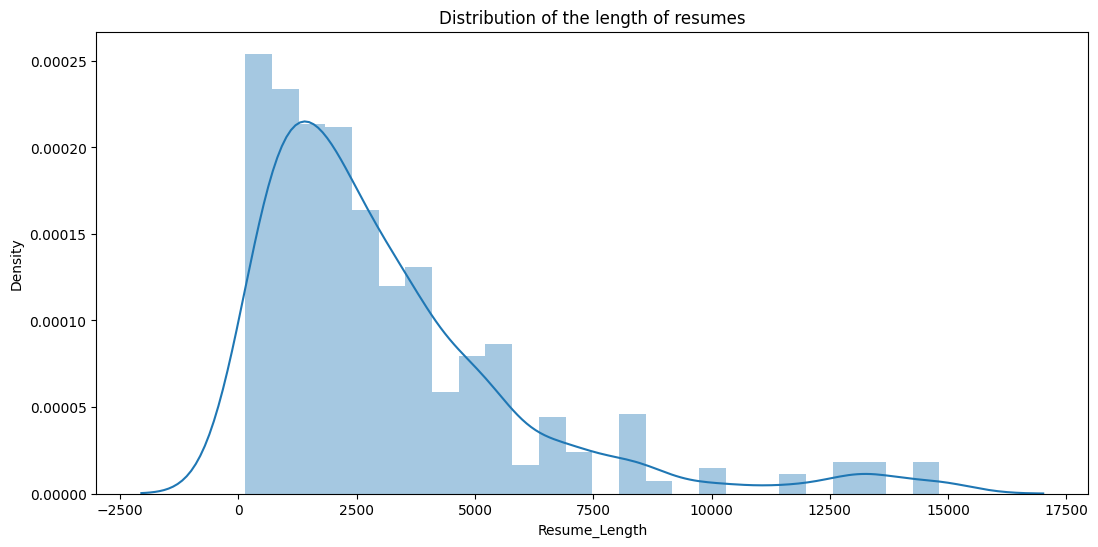

In [12]:
# Tutorial code from LAKPA SHERPA on Kaggle: https://www.kaggle.com/code/sherpalakpa18/resume-screener

#Use seaborn to show the distribution of the length of the resumes
import seaborn as sns

plt.figure(figsize=(12.8,6))
sns.distplot(resume_df['Resume_Length']).set_title('Distribution of the length of resumes')

In [13]:
#Show the count of resumes in each resume category and display on bar chart using Altair
# Altair documentation: https://altair-viz.github.io/

import altair as alt

# Retrieve the count of resumes by category
resumes_by_category = resume_df['Category'].value_counts().reset_index()
resumes_by_category.columns = ['Category', 'Count']

#Sort the number of resumes by category in descending order
resumes_by_category = resumes_by_category.sort_values(by='Count', ascending=False)


bar_chart = alt.Chart(resumes_by_category).mark_bar().encode(
    x='Count:Q',
    y=alt.Y("Category:N", sort='-x', axis=alt.Axis(labelFontWeight='bold'))
).properties(
    height=700,
    title={
        "text": "Number of Resumes by Category",
        "fontSize": 20,
        "font": "Calibri",
        "anchor": "start",
        "color": "black",
        "fontWeight": "bold"
    }
)

# Add labels next to the bars

text = bar_chart.mark_text(
    align='left',
    baseline='middle',
    fontWeight = 'bold',
    dx=3
).encode(
    text='Count:Q')


(bar_chart + text)


alt.LayerChart(...)

In [14]:
# Create function for data preprocessing of the resume dataset to prep data to calculate ratio of each resume in dataset for key words found in the resume by key words in the job description
# Tutorial code from https://www.analyticsvidhya.com/blog/2021/06/resume-screening-with-natural-language-processing-in-python/
import re

resume_processing_df = pd.read_csv('/content/UpdatedResumeDataSet.csv', encoding='utf-8')
def cleanResume(resumeText):
    resumeText = re.sub('http\S+\s*', ' ', resumeText)  # remove URLs
    resumeText = re.sub('#\S+', '', resumeText)  # remove hashtags
    resumeText = re.sub('@\S+', '  ', resumeText)  # remove mentions
    resumeText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', resumeText)  # remove punctuations
    resumeText = re.sub(r'[^\x00-\x7f]',r' ', resumeText) 
    resumeText = re.sub(r'\b(\w+)\s+\1\b', r'\1', resumeText) # remove duplicate words
    resumeText = re.sub(r'\s+', ' ', resumeText)  # remove extra whitespace
    return resumeText



resume_processing_df['cleaned_up_resume'] = resume_processing_df.Resume.apply(lambda x: cleanResume(x))


resume_processing_df

,Category,Resume,cleaned_up_resume
0,Data Science,Skills * Programming Languages: Python (pandas...,Skills Programming Languages Python pandas num...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,Education Details May 2013 to May 2017 B E UIT...
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",Areas of Interest Deep Learning Control System...
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,Skills R Python SAP HANA Tableau SAP HANA SQL ...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",Education Details MCA YMCAUST Faridabad Haryan...
...,...,...,...
957,Testing,Computer Skills: â¢ Proficient in MS office (...,Computer Skills Proficient in MS office Word B...
958,Testing,â Willingness to accept the challenges. â ...,Willingness to accept the challenges Positive...
959,Testing,"PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne...",PERSONAL SKILLS Quick learner Eagerness to lea...
960,Testing,COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...,COMPUTER SKILLS SOFTWARE KNOWLEDGE MS Power Po...


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


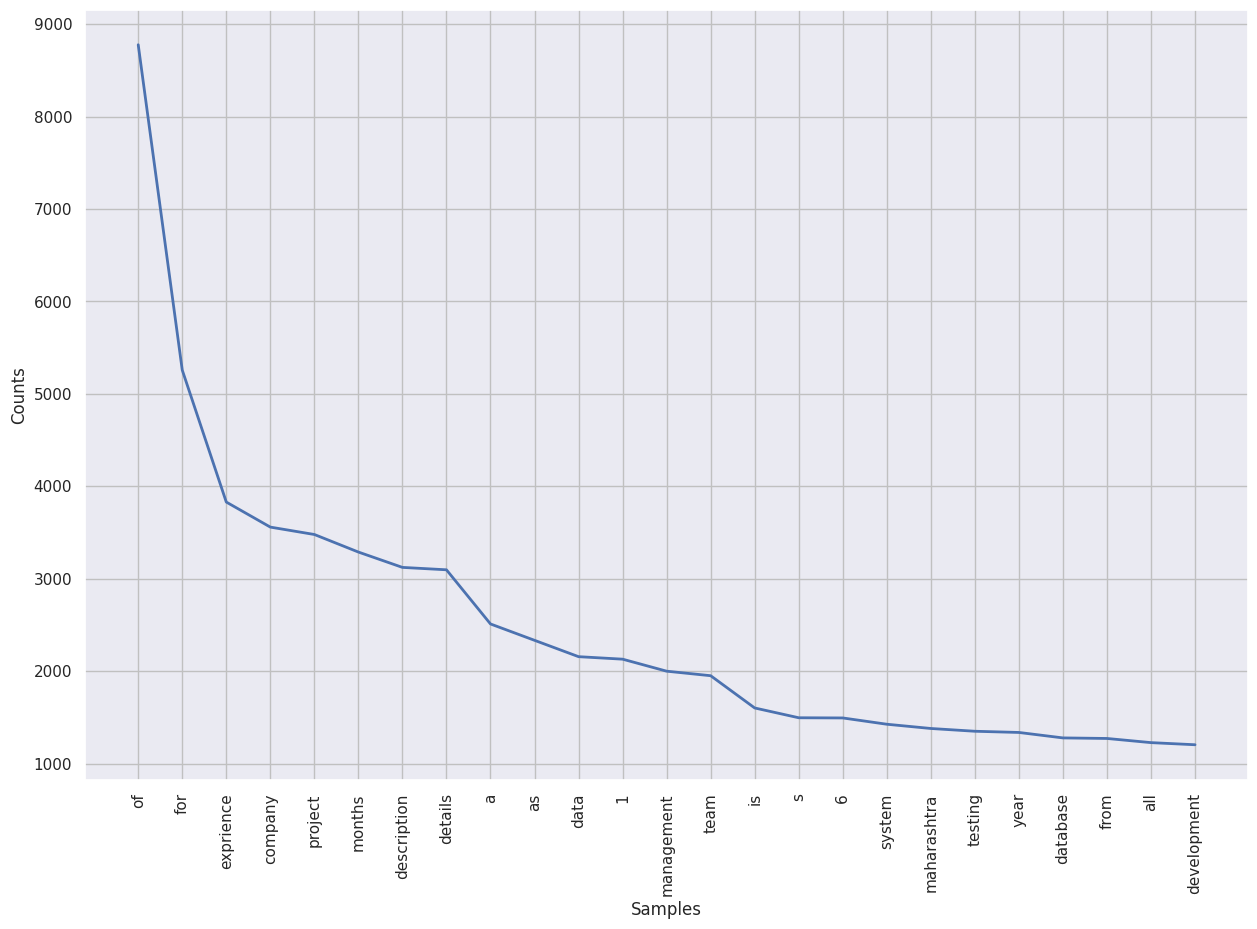

<Axes: xlabel='Samples', ylabel='Counts'>

In [15]:
# Show term frequencies in cleaned up resumes 
# From Kaggle code tutorial https://www.kaggle.com/code/aurelienkcz/resume-nlp

import nltk
from nltk import FreqDist
import matplotlib.pyplot as plt
import seaborn as sns

nltk.download('punkt')
nltk.download('stopwords')

resumes = resume_processing_df['cleaned_up_resume'].tolist()
data_tokens = [word.lower() for resume in resumes for word in nltk.word_tokenize(resume) if word.lower() not in stop_words]
rec_data_tokens = FreqDist(data_tokens)

sns.set()
ax = plt.figure(figsize = (15,10))
rec_data_tokens.plot(25)


Text(0.5, 1.0, 'Wordcloud Data Science resume')

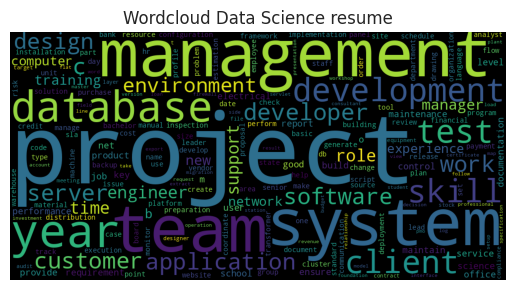

In [16]:
# Generate Word Cloud of Frequent Words
# From Kaggle code tutorial https://www.kaggle.com/code/aurelienkcz/resume-nlp

wordcloud = WordCloud(width = 1000, height = 500).generate(",".join(str(v) for v in rec_data_tokens))  

plt.imshow(wordcloud)
plt.axis("off")
plt.title('Wordcloud Data Science resume')

In [17]:
#Find the key words in the job description 

#From tutorial code https://oindrilasen.com/2021/05/build-resume-scanner-using-python-nlp/


def clean_job_decsription(jd):
     ''' a function to create a word cloud based on the input text parameter'''
     ## Clean the Text
     # Lower
     clean_jd = jd.lower()
     # remove punctuation
     clean_jd = re.sub(r'[^\w\s]', '', clean_jd)
     # remove trailing spaces
     clean_jd = clean_jd.strip()
     # remove numbers
     clean_jd = re.sub('[0-9]+', '', clean_jd)
     # tokenize 
     clean_jd = word_tokenize(clean_jd)
     # remove stop words
     stop = stopwords.words('english')
     clean_jd = [w for w in clean_jd if not w in stop] 
     return(clean_jd)

with open('/content/job_description.txt', 'r') as data:
    job_description = data.read()

clean_jd = clean_job_decsription(job_description) 
print(clean_jd)

['develop', 'machine', 'learning', 'models', 'predict', 'consumer', 'travel', 'preferences', 'based', 'past', 'preferences', 'develop', 'machine', 'learning', 'models', 'offer', 'tailormade', 'recommendations', 'customers', 'collaborate', 'development', 'team', 'deploy', 'machine', 'learning', 'models', 'production', 'troubleshoot', 'vulnerabilities', 'code', 'analyze', 'wrangle', 'large', 'datasets', 'derive', 'meaningful', 'insights', 'data', 'drive', 'strategy', 'future', 'product', 'offerings', 'keep', 'abreast', 'latest', 'technology', 'artificial', 'intelligence', 'machine', 'learning', 'drive', 'future', 'product', 'enhancements']


In [18]:
# Find top 5 resumes based on the ratio of matching relevant skills with total number of relevant skills in job description
# Tutorial code from https://medium.com/mlearning-ai/automatic-skill-extraction-from-resumes-using-spacy-710507624a1e

import spacy
from spacy.matcher import PhraseMatcher

def extract_skills(resume_text):
    nlp = spacy.load("en_core_web_sm")
    matcher = PhraseMatcher(nlp.vocab)
    skills = clean_jd 
    skill_patterns = [nlp(text) for text in skills]
    matcher.add("SKILLS", None, *skill_patterns)
    doc = nlp(resume_text)
    matches = matcher(doc)
    skills_list = []
    for match_id, start, end in matches:
        span = doc[start:end]
        skills_list.append(span.text)
    return skills_list


In [19]:
# Print relevant skills in job description

relevant_skills = ['machine learning', 'models', 'predict', 'recommend', 'collaborate', 'development', 'team', 'deploy', 'production', 'troubleshoot', 'vulnerabilities', 'code', 'analyze', 'wrangle', 'datasets', 'insights', 'data', 'drive', 'strategy', 'artificial intelligence']

print(relevant_skills)

['machine learning', 'models', 'predict', 'recommend', 'collaborate', 'development', 'team', 'deploy', 'production', 'troubleshoot', 'vulnerabilities', 'code', 'analyze', 'wrangle', 'datasets', 'insights', 'data', 'drive', 'strategy', 'artificial intelligence']


In [20]:
# Create a PhraseMatcher and add skills to it 

# From tutorial code: https://medium.com/mlearning-ai/automatic-skill-extraction-from-resumes-using-spacy-710507624a1e

nlp = spacy.load("en_core_web_sm")
skill_patterns = list(nlp.pipe(relevant_skills))
matcher = PhraseMatcher(nlp.vocab, attr="LOWER")
matcher.add("SKILL", skill_patterns)

In [21]:
# Define custom component for skill extraction

# From tutorial code: https://medium.com/mlearning-ai/automatic-skill-extraction-from-resumes-using-spacy-710507624a1e

import spacy
from spacy.language import Language
from spacy.matcher import PhraseMatcher
from spacy.tokens import Span

@Language.component("skill_component")
def skill_component(doc):
    matches = matcher(doc)
    spans = [Span(doc, start, end, label="SKILL") for match_id, start, end in matches]
    doc.ents = spans
    return doc

In [22]:
# Add custom component to the pipeline

# From tutorial code: https://medium.com/mlearning-ai/automatic-skill-extraction-from-resumes-using-spacy-710507624a1e

nlp.add_pipe("skill_component", after="ner")
print(nlp.pipe_names)

['tok2vec', 'tagger', 'parser', 'attribute_ruler', 'lemmatizer', 'ner', 'skill_component']


In [23]:
# Loop through the resumes from Kaggle dataset and extract the skills

# From tutorial code: https://medium.com/mlearning-ai/automatic-skill-extraction-from-resumes-using-spacy-710507624a1e

resume_texts = resumes
for idx, text in enumerate(resume_texts):
    doc = nlp(text)
    unique_skills = set()
    print(f"Skills in Resume {idx + 1}:")
    for ent in doc.ents:
        if ent.label_ == "SKILL":
            unique_skills.add(ent.text)
    for skill in unique_skills:
        print(skill)
    print()

Skills in Resume 1:
development
Data
team
data
DATA
Machine learning
models

Skills in Resume 2:
machine learning
Machine learning
Data

Skills in Resume 3:
Machine Learning
strategy
Data
DATA
Development

Skills in Resume 4:
Production
Data
development
team
data
production
models
Machine learning
insights
deploy

Skills in Resume 5:
Data

Skills in Resume 6:
machine learning
Machine Learning
data
Data

Skills in Resume 7:
Machine Learning
MACHINE LEARNING
Data
machine learning
data
DATA

Skills in Resume 8:
Machine Learning
artificial intelligence
code
development
Data
machine learning
data
Machine learning
Team
Development

Skills in Resume 9:
Machine Learning
Data
data
models
Machine learning

Skills in Resume 10:
Machine Learning
Data
team
data
insights
analyze

Skills in Resume 11:
development
Data
team
data
DATA
Machine learning
models

Skills in Resume 12:
machine learning
Machine learning
Data

Skills in Resume 13:
Machine Learning
strategy
Data
DATA
Development

Skills in Resu

In [24]:
# Calculate the ratio of skills matching key words from job description found for each resume to the total key words in the job description
# from tutorial code: https://medium.com/mlearning-ai/automatic-skill-extraction-from-resumes-using-spacy-710507624a1e


resume_texts = resumes
resume_skills = []
relevant_skills = ['machine learning', 'models', 'predict', 'recommend', 'collaborate', 'development', 'team', 'deploy', 'production', 'troubleshoot', 'vulnerabilities', 'code', 'analyze', 'wrangle', 'datasets', 'insights', 'data', 'drive', 'strategy', 'artificial intelligence']
skill_counts = []

for idx, text in enumerate(resume_texts):
    doc = nlp(text)
    skills = list(set([ent.text.lower() for ent in doc.ents if ent.label_ == "SKILL"]))
    count = len(skills)
    ratio = count / len(relevant_skills)
    skill_counts.append((idx, ratio))
    resume_skills.append(skills)


sorted_list = sorted(skill_counts, key=lambda x: x[1], reverse=True)
top_5_resumes = sorted_list[:5]
for idx, ratio in top_5_resumes:
    print(f"Resume {idx+1} has a skill count ratio of {ratio:.2f}")


Resume 4 has a skill count ratio of 0.40
Resume 14 has a skill count ratio of 0.40
Resume 24 has a skill count ratio of 0.40
Resume 34 has a skill count ratio of 0.40
Resume 512 has a skill count ratio of 0.40


In [26]:
# Create a ChatBot to conduct the HR screening interview and collect the interviewer's email, phone, work location preference, reference info, phone #, and earliest interview date

# Tutorial code from https://www.twilio.com/blog/build-custom-ai-chatbot-whatsapp-python-twilio-chatgpt-api


from sqlalchemy import create_engine, Column, Integer, String
from sqlalchemy.orm import sessionmaker
from sqlalchemy.ext.declarative import declarative_base

# Set the database connection URL
db_url = 'sqlite:///candidate_responses.db'

# Create SQL Alchemy engine to connect to the database
engine = create_engine(db_url)

# Create session maker to bound new sessions
Session = sessionmaker(bind=engine)

# Declare base class
Base = declarative_base()

# Create candidate model class that inherits from the base
class Candidate(Base):
    __tablename__ = 'answers_candidates'

    id = Column(Integer, primary_key=True)
    email = Column(String)
    phone = Column(String)
    work_preference = Column(String)
    reference_name = Column(String)
    reference_contact = Column(String)
    interview_date = Column(String)

# Create the table
Base.metadata.create_all(engine)

# Ask the interview candidate for their email, phone number, reference contact info, and earliest start date
email = input("What is your email address?")
phone = input("What is your phone number?")
work_preference = input("Would you like to work remotely, hybrid, or in-office? ")
reference_name = input("Please enter the first and last name of your reference: ")
reference_contact = input("Please enter the phone number for your reference: ")
interview_date = input("When is the earliest date you can interview? (Format as MM/DD/YYYY) ")

# Create a candidate object based on the candidate's responses
candidate = Candidate(
    email=email,
    phone=phone,
    work_preference=work_preference,
    reference_name=reference_name,
    reference_contact=reference_contact,
    interview_date=interview_date
)

# Add the candidate object to the new session
session = Session()
session.add(candidate)

# Commit 
session.commit()

# Close the session
session.close()


<ipython-input-26-8a0759e0f7ef>:20: MovedIn20Warning: The ``declarative_base()`` function is now available as sqlalchemy.orm.declarative_base(). (deprecated since: 2.0) (Background on SQLAlchemy 2.0 at: https://sqlalche.me/e/b8d9)
  Base = declarative_base()


What is your email address?diesel127@yahoo.com
What is your phone number?972-765-8970
Would you like to work remotely, hybrid, or in-office? hybrid
Please enter the first and last name of your reference: Sam Goody
Please enter the phone number for your reference: 670-864-9021
When is the earliest date you can interview? (Format as MM/DD/YYYY) 04/30/2023


In [27]:
# Define the metadata for the candidate table and query the results of the table

# Tutorial code from SQLAlchemy documentation https://docs.sqlalchemy.org/en/20/core/selectable.html#sqlalchemy.sql.expression.Select


from sqlalchemy import create_engine, MetaData, Table, Column, Integer, String

# Create SQL Alchemy engine to connect to the database
engine = create_engine('sqlite:///candidate_responses.db')

# Define metadata for the table
metadata = MetaData()
candidate_responses = Table('answers_candidates', metadata,
    Column('email', String),
    Column('phone', String),
    Column('work_preference', String),
    Column('reference_name', String),
    Column('reference_contact', String),
    Column('interview_date', String),
)

# Connect to the database and execute a SELECT statement
with engine.connect() as conn:
    select_statement = candidate_responses.select()
    rows = conn.execute(select_statement).fetchall()

# Print the results
for row in rows:
    print(row)


('diesel127@yahoo.com', '972-765-8970', 'hybrid', 'Sam Goody', '670-864-9021', '04/30/2023')


In [ ]:
!pip install icalendar

In [28]:
#Create an iCalendar invite for the interview based on the date preference of the interview candidate

# Tutorial code from https://learnpython.com/blog/working-with-icalendar-with-python/

# imports
import icalendar
from icalendar import Calendar, Event, vCalAddress, vText
from datetime import datetime
from pathlib import Path
import os
import pytz
 
# init the calendar
cal = Calendar()

# Some properties are required to be compliant
cal.add('prodid', '-//My calendar product//example.com//')
cal.add('version', '2.0')

# Get the Central Time Zone object
central_tz = pytz.timezone('US/Central')

# Set the start and end times in Central Time Zone
start_time = datetime.strptime(interview_date + ' 9:00 AM', '%m/%d/%Y %I:%M %p')
end_time = datetime.strptime(interview_date + ' 11:00 AM', '%m/%d/%Y %I:%M %p')

# Convert the times to UTC
start_time_utc = central_tz.localize(start_time).astimezone(pytz.utc)
end_time_utc = central_tz.localize(end_time).astimezone(pytz.utc)

# Create the event object
event = Event()
event.add('name', 'Interview for Data Science Position at VibranTech')
event.add('description', 'Final Interview with Hiring Manager and HR')
event.add('dtstart', start_time_utc)
event.add('dtend', end_time_utc)
 
# Add the organizer
organizer = vCalAddress('MAILTO: a_johnson@vibrantech.com')
 
# Add parameters of the event
organizer.params['name'] = vText('Sam Patel')
organizer.params['role'] = vText('Data Scientist')
event['organizer'] = organizer
event['location'] = vText('Dallas, TX, USA')
 
event['uid'] = '2022125T111010/272356262376@example.com'
event.add('priority', 5)
attendee = vCalAddress('MAILTO:spatel@example.com')
attendee.params['name'] = vText('Alexandra Johnson')
attendee.params['role'] = vText('REQ-PARTICIPANT')
event.add('attendee', attendee, encode=0)
 
attendee = vCalAddress('MAILTO:jsmith@example.com')
attendee.params['name'] = vText('David Nguyen')
attendee.params['role'] = vText('REQ-PARTICIPANT')
event.add('attendee', attendee, encode=0)
 
# Add the event to the calendar
cal.add_component(event)

# Write to disk
directory = Path.cwd() / 'MyCalendar'
try:
   directory.mkdir(parents=True, exist_ok=False)
except FileExistsError:
   print("Folder already exists")
else:
   print("Folder was created")
 
f = open(os.path.join(directory, 'interview.ics'), 'wb')
f.write(cal.to_ical())
f.close()

e = open('MyCalendar/interview.ics', 'rb')
ecal = icalendar.Calendar.from_ical(e.read())
for component in ecal.walk():
   print(component.name)
e.close()

Folder was created
VCALENDAR
VEVENT
